In [16]:
from Clustering import *
import matplotlib.pyplot as plt

In [17]:
num_repeats = 1

# Experiment 1:
Changing n, depending on the regime of TH

In [10]:
# range of n, number of contexts
n_range = range(100, 200, 20)
# n_range = range(100, 300, 20)
# n_range = range(100, 300, 20)
N = len(n_range)
# us = [0, 0.5, 1, 1.5, 2]  # TH = n (log n)^u
us = [0, 1, 2]  # TH = n (log n)^u
# number of actions, clusters
S, A = 2, 2
# symmetric binary case
eps = 0.2
latent_transitions = [np.array([[1 / 2 - eps, 1 / 2 + eps], [1 / 2 + eps, 1 / 2 - eps]]),
                      np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])]

init_errors_mean1 = np.ones((len(us), len(n_range)))
init_errors_std1 = np.ones((len(us), len(n_range)))
final_errors_mean1 = np.ones((len(us), len(n_range)))
final_errors_std1 = np.ones((len(us), len(n_range)))

# main loop 1
for j, n in enumerate(n_range):
    # set H
    H = int(np.ceil(n / 2))
    # set environment
    env_config = {'n': n, 'H': H, 'S:': S, 'A': A,
                  'ps': latent_transitions,
                  'qs': 'uniform'}
    env = Synthetic(env_config)
    # true clusters
    f = {}
    for s in range(env.S):
        cluster = env.partitions[s]
        for x in range(cluster.start, cluster.start + cluster.n):
            f[x] = s
    # main loop 2
    for i, u in enumerate(us):
        print(f"#### n = {n}, TH = n (log n)^{u} ### \n")
        # set T
        T = int(np.ceil(n * A * (np.log(n * A) ** u)) / H)
        init_errors, final_errors = [], []
        for _ in range(num_repeats):
            # obtain trajectories
            trajectories = generate_trajectories(T, env)

            # initial spectral clustering
            f_1 = init_spectral(env, trajectories)
            init_err_rate = error_rate(f, f_1, env.n, env.S)
            init_errors.append(init_err_rate)
            # print("Error rate after initial clustering is ", init_err_rate)

            # likelihood_improvement
            # f_final, errors = likelihood_improvement(env, trajectories, f_1, f, num_iter=10)
            f_final, errors = likelihood_improvement(env, trajectories, f_1, f, num_iter=None)
            final_errors.append(errors[-1])
            # print("Final error rate is ", errors[-1])
            # print("Errors along the improvement steps: ", errors)

        print("initial: ", init_errors)
        print("final: ", final_errors)
        # logging
        init_errors_mean1[i][j] = np.mean(init_errors)
        init_errors_std1[i][j] = np.std(init_errors)
        final_errors_mean1[i][j] = np.mean(final_errors)
        final_errors_std1[i][j] = np.std(final_errors)

#### n = 100, TH = n (log n)^0 ### 

initial:  [0.46, 0.47, 0.45, 0.48, 0.47, 0.49, 0.49, 0.48, 0.45, 0.41]
final:  [0.5, 0.44, 0.46, 0.5, 0.5, 0.5, 0.5, 0.43, 0.46, 0.45]
#### n = 100, TH = n (log n)^1 ### 

initial:  [0.49, 0.44, 0.46, 0.44, 0.48, 0.42, 0.42, 0.48, 0.42, 0.48]
final:  [0.42, 0.48, 0.47, 0.38, 0.44, 0.39, 0.33, 0.46, 0.48, 0.48]
#### n = 100, TH = n (log n)^2 ### 

initial:  [0.02, 0.06, 0.34, 0.34, 0.27, 0.37, 0.49, 0.28, 0.48, 0.47]
final:  [0.0, 0.0, 0.01, 0.0, 0.0, 0.01, 0.11, 0.01, 0.5, 0.46]
#### n = 120, TH = n (log n)^0 ### 



IndexError: list index out of range

In [ ]:
# FINAL PLOTS
fig, axs = plt.subplots(len(us), sharex=True)
fig.suptitle("Experiment 1: Varying n and u")
for i, u in enumerate(us):
    axs[i].errorbar(n_range, init_errors_mean1[i], yerr=1.96*init_errors_std1/np.sqrt(num_repeats), marker="o")
    axs[i].errorbar(n_range, final_errors_mean1[i], yerr=1.96*final_errors_std1/np.sqrt(num_repeats), marker="o")
    axs[i].title(f"TH = n (log n)^{u}")
    axs[i].legend(["spectral","spectral + improvement"])
    axs.xlabel("n")
    axs.ylabel("error rate")
fig.savefig("plot_exp1.pdf", dpi=500)

np.savez_compressed("exp1", init_mean=init_errors_mean1, init_std=init_errors_std1, final_mean=final_errors_mean1, final_std=final_errors_std1)

# Experiment 2:
Fixing n, change TH

In [3]:
n = 100
# set H
H = int(np.ceil(n / 2))
# range of T
T_range = np.array(range(10, 110, 10))
T_num = len(T_range)

# number of actions, clusters
S, A = 2, 2
# symmetric binary case
eps = 0.2
latent_transitions = [np.array([[1 / 2 - eps, 1 / 2 + eps], [1 / 2 + eps, 1 / 2 - eps]]),
                      np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])]
# set environment
env_config = {'n': n, 'H': H, 'S:': S, 'A': A,
              'ps': latent_transitions,
              'qs': 'uniform'}
env = Synthetic(env_config)
# true clusters
f = {}
for s in range(env.S):
    cluster = env.partitions[s]
    for x in range(cluster.start, cluster.start + cluster.n):
        f[x] = s


init_errors_mean2 = np.ones(T_num)
init_errors_std2 = np.ones(T_num)
final_errors_mean2 = np.ones(T_num)
final_errors_std2 = np.ones(T_num)

# main loop
for i, T in enumerate(T_range):
    print(f"#### TH = {T*H} ### \n")
    init_errors, final_errors = [], []
    for _ in range(num_repeats):
        # obtain trajectories
        trajectories = generate_trajectories(T, env)

        # initial spectral clustering
        f_1 = init_spectral(env, trajectories)
        init_err_rate = error_rate(f, f_1, env.n, env.S)
        init_errors.append(init_err_rate)
        # print("Error rate after initial clustering is ", init_err_rate)

        # likelihood_improvement
        # f_final, errors = likelihood_improvement(env, trajectories, f_1, f, num_iter=10)
        f_final, errors = likelihood_improvement(env, trajectories, f_1, f, num_iter=None)
        final_errors.append(errors[-1])
        # print("Final error rate is ", errors[-1])
        # print("Errors along the improvement steps: ", errors)

    print("initial: ", init_errors)
    print("final: ", final_errors)
    # logging
    init_errors_mean2[i] = np.mean(init_errors)
    init_errors_std2[i] = np.std(init_errors)
    final_errors_mean2[i] = np.mean(final_errors)
    final_errors_std2[i] = np.std(final_errors)

#### TH = 500 ### 

initial:  [0.48, 0.48, 0.45, 0.49, 0.45, 0.37, 0.5, 0.39, 0.43, 0.46]
final:  [0.49, 0.5, 0.43, 0.5, 0.48, 0.41, 0.5, 0.43, 0.47, 0.5]
#### TH = 1000 ### 

initial:  [0.46, 0.5, 0.48, 0.38, 0.46, 0.46, 0.4, 0.49, 0.43, 0.44]
final:  [0.43, 0.49, 0.44, 0.22, 0.32, 0.47, 0.25, 0.43, 0.41, 0.42]
#### TH = 1500 ### 

initial:  [0.48, 0.41, 0.14, 0.44, 0.37, 0.4, 0.43, 0.5, 0.44, 0.36]
final:  [0.41, 0.19, 0.04, 0.22, 0.11, 0.32, 0.45, 0.45, 0.45, 0.29]
#### TH = 2000 ### 

initial:  [0.4, 0.42, 0.3, 0.39, 0.38, 0.36, 0.49, 0.2, 0.26, 0.29]
final:  [0.42, 0.48, 0.05, 0.03, 0.09, 0.16, 0.46, 0.03, 0.04, 0.08]
#### TH = 2500 ### 

initial:  [0.34, 0.47, 0.24, 0.36, 0.47, 0.46, 0.14, 0.42, 0.26, 0.19]
final:  [0.07, 0.35, 0.03, 0.09, 0.41, 0.33, 0.05, 0.49, 0.02, 0.0]
#### TH = 3000 ### 

initial:  [0.43, 0.33, 0.11, 0.48, 0.18, 0.44, 0.35, 0.44, 0.16, 0.45]
final:  [0.49, 0.41, 0.01, 0.37, 0.01, 0.46, 0.02, 0.45, 0.02, 0.44]
#### TH = 3500 ### 

initial:  [0.04, 0.26, 0.42

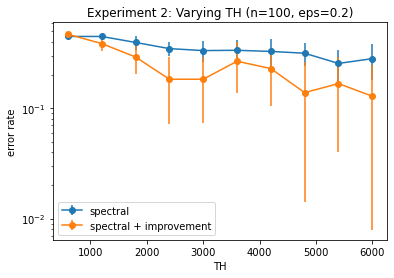

In [14]:
# FINAL PLOTS
fig = plt.figure()
plt.errorbar(H*T_range, init_errors_mean2, yerr=1.96*init_errors_std2/np.sqrt(num_repeats), marker="o")
plt.errorbar(H*T_range, final_errors_mean2, yerr=1.96*final_errors_std2/np.sqrt(num_repeats), marker="o")
plt.title("Experiment 2: Varying TH (n=100, eps=0.2)")
plt.legend(["spectral","spectral + improvement"])
plt.xlabel("TH")
plt.ylabel("error rate")
plt.yscale("log")
fig.savefig("plot_final_exp2.pdf", dpi=500)

np.savez_compressed("exp2", init_mean=init_errors_mean2, init_std=init_errors_std2, final_mean=final_errors_mean2, final_std=final_errors_std2)

# Experiment 3:
Fixing n,T,H, change epsilon

In [ ]:
n = 500
# set T, H
H = n
T = 30

# number of actions, clusters
S, A = 2, 2

# range of epsilon
eps_range = np.arange(0, 0.5, 0.05)
eps_num = len(eps_range)

init_errors_mean3 = np.ones(eps_num)
init_errors_std3 = np.ones(eps_num)
final_errors_mean3 = np.ones(eps_num)
final_errors_std3 = np.ones(eps_num)

# main loop
for i, eps in enumerate(eps_range):
    # symmetric binary case
    latent_transitions = [np.array([[1 / 2 - eps, 1 / 2 + eps], [1 / 2 + eps, 1 / 2 - eps]]),
                          np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])]
    # set environment
    env_config = {'n': n, 'H': H, 'S:': S, 'A': A,
                  'ps': latent_transitions,
                  'qs': 'uniform'}
    env = Synthetic(env_config)
    # true clusters
    f = {}
    for s in range(env.S):
        cluster = env.partitions[s]
        for x in range(cluster.start, cluster.start + cluster.n):
            f[x] = s

    print(f"#### epsilon = {eps} ### \n")
    init_errors, final_errors = [], []
    for _ in range(num_repeats):
        # obtain trajectories
        trajectories = generate_trajectories(T, env)

        # initial spectral clustering
        f_1 = init_spectral(env, trajectories)
        init_err_rate = error_rate(f, f_1, env.n, env.S)
        init_errors.append(init_err_rate)
        # print("Error rate after initial clustering is ", init_err_rate)

        # likelihood_improvement
        # f_final, errors = likelihood_improvement(env, trajectories, f_1, f, num_iter=10)
        f_final, errors = likelihood_improvement(env, trajectories, f_1, f, num_iter=None)
        final_errors.append(errors[-1])
        # print("Final error rate is ", errors[-1])
        # print("Errors along the improvement steps: ", errors)

    print("initial: ", init_errors)
    print("final: ", final_errors)
    # logging
    init_errors_mean3[i] = np.mean(init_errors)
    init_errors_std3[i] = np.std(init_errors)
    final_errors_mean3[i] = np.mean(final_errors)
    final_errors_std3[i] = np.std(final_errors)

#### epsilon = 0.0 ### 



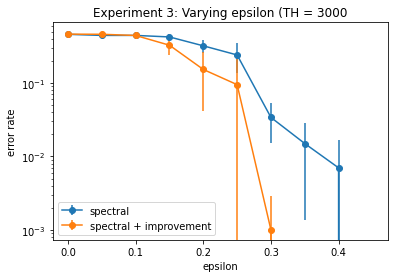

In [12]:
# FINAL PLOTS
fig = plt.figure()
plt.errorbar(eps_range, init_errors_mean3, yerr=1.96*init_errors_std3/np.sqrt(num_repeats), marker="o")
plt.errorbar(eps_range, final_errors_mean3, yerr=1.96*final_errors_std3/np.sqrt(num_repeats), marker="o")
plt.title("Experiment 3: Varying epsilon (TH = 3000)")
plt.legend(["spectral","spectral + improvement"])
plt.xlabel("epsilon")
plt.ylabel("error rate")
plt.yscale("log")
fig.savefig("plot_final_exp3.pdf", dpi=500)

np.savez_compressed("exp3", init_mean=init_errors_mean3, init_std=init_errors_std3, final_mean=final_errors_mean3, final_std=final_errors_std3)